# Week 1

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 

In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import sys
sys.path.append("../")
import edhec_risk_kit as erk

In [24]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")  

### Returns

Definition of simple (price) **return**: how much we gain (or loose) from the price at time $t+1$ and the price at time $t$. 
That is:
$$
P_{t+1} = P_{t} + R_{t,t+1}P_{t} = P_{t}(1+R_{t,t+1})
\qquad\Longrightarrow\qquad 
R_{t,t+1} := \frac{P_{t+1} - P_t}{P_{t}} = \frac{P_{t+1}}{P_t} - 1. 
$$

For example, $P_t=\$100$ and $P_{t+1}=\$104$. Hence $R_{t,t+1}=104/100-1=0.04=4\%$.

### Compound return

If we look at two time periods, the overall returns is not just the sum of the returns over the two periods. 
For example, consider the variation of price during two time periods:
$$
P_1 = P_0 + R_{0,1}P_0
\qquad\text{and}\qquad 
P_2 = P_1 + R_{1,2}P_1. 
$$
Substitue $P_1$ into $P_2$:
$$
P_2 = P_0 + R_{0,1}P_0 + R_{1,2}( P_0 + R_{0,1}P_0 ) = P_0 + R_{0,1}P_0 + R_{1,2}P_0 + R_{1,2}R_{0,1}P_0.
$$
Hence, the **total return** over the period $(0,2)$ is given by:
$$
R_{0,2} = \frac{P_2}{P_0} - 1 
= 1 + R_{0,1}+R_{1,2}+R_{1,2}R_{0,1} - 1 
= (1 + R_{0,1})(1 + R_{1,2}) - 1.
$$
That is, in general, given a time frame $(t, t+k)$, with $k>1$:
$$
R_{t,t+k} = (1+R_{t,t+1})(1+R_{t+1,t+2})\cdots(1+R_{t+k-1,t+k}) - 1.
$$

### Compound return in case of equal returns

If the returns are the same over all time periods, say $R$, for the entire given time frame $(t, t+k)$, with $k>1$, 
then the compound returns becomes simply
$$
R_{t,t+k} = (1+R)^{k} - 1.
$$

#### Examples

**1)** Suppose we buy a stock that on the first day gains the $10\%$ whereas on the second day looses the $3\%$. 
**What is the total return at the end of the second day?**

Using the formula for compound returns:
$$
R_{0,2} = (1 + R_{0,1})(1 + R_{1,2}) - 1 = (1 + 0.10)(1 - 0.03) - 1 = 0.066999 = 6.7\%.
$$

As we can see, this is not simply $10\%$ minus $3\%$, i.e., $7\%$, but it is something lower$\dots$

**2) What is the annualized return of a stock** which has a $1\%$ return over a quarter, i.e., three months 
(that is, supposing that the stock return is $1\%$ over all quarters)? 

As the returns over quarters are the same ($1\%$), and in one year there are $4$ quarters, we use the simplified formula for 
compound returns:
$$
R_{0,12} = (1 + R_{0,3})^4 - 1 = (1 + 0.01)^4 - 1 = 0.040604 = 4.06\%, 
$$
where $R_{0,3}$ is the same as $R_{3,6}$, and so on.

### Return per month
Suppose we have a series of **monthly returns**, i.e., each timeframe $t$ represents a month time period. 
In the example above, for the period $(0,2)$ we have two months, with prices $P_0$ (at the beginnnig of the first month), $P_1$ at the end of the first month, and $P_2$ at the end of the second month. 

The compound (total) return after two months is $R_{total} := R_{0,2} = (1+R_{0,1})(1+R_{1,2})-1$, where $R_{0,1}$ and $R_{1,2}$ are the returns of the first and the second month, respectively. 

What is the **return per month**, i.e., **the fixed return for each month that will give the same total return $R_{total}$?** 
That is, we are asking for the value $R_{pm}$ such that:
$$
R_{total} = (1 + R_{pm})^2 - 1,
$$
where we have used the simplified formula as $R_{pm}$ is going to be the same for the $2$ months considered. 
We get: 
$$
R_{pm} = (1 + R_{total})^{1/2} - 1 = ((1+R_{0,1})(1+R_{1,2}))^{1/2} - 1.
$$

In general, in the equation above we **divide by the number of given months** ($2$ in this case). 

### Return per year (or annualized return)
If we have monthly returns and a (fixed) *return per month*, we can *infer* what will be the **annualized return**, or **return per year**, i.e., the total (compound) return after $12$ months: 
$$
R_{py} = (1 + R_{pm})^{12} - 1. 
$$

If we don't compute the return per month beforehand, we can still obtain the return per year from our series of monthly returns, 
in particular, from the total compuond return. 
For example, is we use the formula for $R_{pm}$ that we have above, we obtain 
$$
R_{py} 
= \left(1 + \underbrace{R_{pm}}\right)^{12} - 1
= \left(1 + \underbrace{(1+R_{total})^{1/2} - 1}\right)^{12} - 1 = (1 + R_{total})^{12/2} - 1.
$$

In general, given a series of monthly returns, there holds
$$
R_{py} = (1 + R_{total})^{12/n} - 1,
$$
where $n$ is the number of available months under consideration and $R_{total}$ is the compound (total) return over all the available months we have. 

#### General formula

The formula above works for any kind of available returns that we may have, e.g., daily, weekly, or monthly returns. 
The difference would be in the numerator of the power.

For example, if we have a series of **daily returns**, then the annualized return is given by:
$$
R_{py} 
= \left(1 + \underbrace{R_{pd}}\right)^{252} - 1
= \left(1 + \underbrace{(1+R_{total})^{1/N_{\text{rets}}} - 1}\right)^{252} - 1 = (1 + R_{total})^{252/N_{\text{rets}}} - 1,
$$
where again, $R_{total}$ is the compound (total) return of the series of (daily) returns that we have, 
$252$ is the approximate number of (**trading**) days in one year, and $N_{\text{rets}}$ is the lenght of our series of returns. 

**In general**:
$$
R_{py} = (1 + R_{total})^{P_{y}/N_{\text{rets}}} - 1,
\quad\text{where}\quad
P_{y} =
\begin{cases}
&252  & \text{if we have daily returns},\\
&52   & \text{if we have weekly returns},\\
&12  & \text{if we have monthly returns.}
\end{cases}
$$
The variable $P_y$ is called **periods_per_year**.


### Volatility (or risk)

The **volatility** of an asset is simply the standard deviation of the returns of the asset:
$$
\sigma := \sqrt{  \frac{1}{N-1} \sum_{t} (R_t - \mu)^2  },
$$
where $R_t$ is our series of returns at time $t$ and $\mu$ is the sample mean of the returns, i.e., $\mu := \frac{1}{N}\sum_{t}R_t$, 
with $N$ denoting the number of returns.

### Adjusting the volatility

Suppose that we have **monthly** returns and we compute the volatily of our asset, that is, we compute the **monthly volatility**. 
What if we want to know the **volatility over the year?** 
It is clear that we cannot compare the volatility obtained from data corresponding to different time scales. 
The way to proceed is the following:
$$
\sigma_{ann} = \sigma_{p} \sqrt{p},
$$
where $\sigma_{ann}$ is the **annualized volatility**, or volatility per year, whereas $p$ stands for the period considered 
and $\sigma_p$ the corresponding computed volatility. 

For example:

1) In case of **monthly** returns with volatility $\sigma_m$, we compute the annualized volatility 
by doing $\sigma_{ann}=\sigma_m\sqrt{12}$;

2) In case of **weekly** returns with volatility $\sigma_w$, we compute the annualized volatility 
by doing $\sigma_{ann}=\sigma_w\sqrt{52}$;

3) In case of **daily** returns with volatility $\sigma_d$, we compute the annualized volatility 
by doing $\sigma_{ann}=\sigma_d\sqrt{252}$.

### Example

In [25]:
# Generate two stock prices from N(10,1) and N(10,5) normal distributions 
np.random.seed(51)
stocks = pd.DataFrame( {"A" : np.random.normal(10,1,size=10), "B" : np.random.normal(10,5,size=10)} )
stocks

,A,B
0,9.709497,7.471746
1,10.112128,7.078454
2,11.250795,3.634503
3,8.639110,13.733915
4,10.099933,7.208269
5,9.952009,9.445992
6,9.643770,4.063317
7,8.911441,4.958870
8,9.648982,6.550691
9,12.588400,9.571787


In [26]:
# compute the returns using the shift method
stocks["returns A"] = stocks["A"]/stocks["A"].shift(1) - 1
stocks["returns B"] = stocks["B"]/stocks["B"].shift(1) - 1
stocks

,A,B,returns A,returns B
0,9.709497,7.471746,NaN,NaN
1,10.112128,7.078454,0.041468,-0.052637
2,11.250795,3.634503,0.112604,-0.486540
3,8.639110,13.733915,-0.232133,2.778760
4,10.099933,7.208269,0.169094,-0.475148
5,9.952009,9.445992,-0.014646,0.310438
6,9.643770,4.063317,-0.030972,-0.569837
7,8.911441,4.958870,-0.075938,0.220400
8,9.648982,6.550691,0.082763,0.321005
9,12.588400,9.571787,0.304635,0.461187


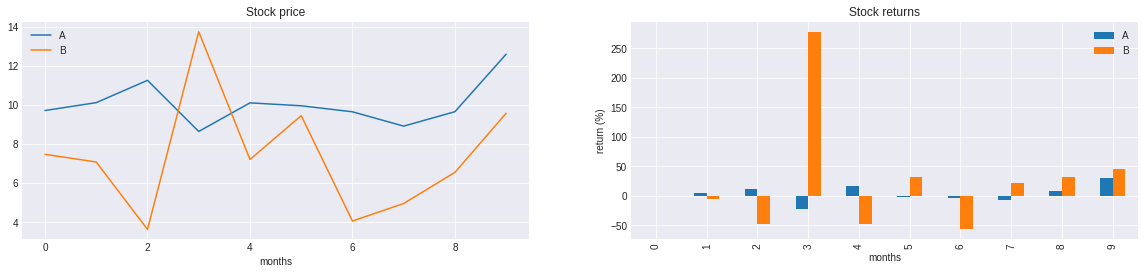

In [27]:
f, ax = plt.subplots(1,2,figsize=(20,4))
ax[0].plot( stocks[["A","B"]] )
ax[0].set_title('Stock price')
ax[0].set_xlabel("months") 
ax[1].set_ylabel("price") 
ax[0].legend(["A","B"])
ax[0].grid()
(stocks[["returns A","returns B"]]*100).plot.bar(ax=ax[1]) 
ax[1].set_title('Stock returns')
ax[1].set_xlabel("months") 
ax[1].set_ylabel("return (%)") 
ax[1].legend(["A","B"])
ax[1].grid()
plt.show()

In [28]:
# compute the total (compound) return over the entire time frame (using prod() method)
total_ret = (1 + stocks[["returns A","returns B"]]).prod() - 1 
print("Total returns (%):")
total_ret*100

Total returns (%):


returns A    29.650384
returns B    28.106429
dtype: float64

In [29]:
# compute the means and the volatility of the stock
means      = stocks[["returns A","returns B"]].mean()
volatility = stocks[["returns A","returns B"]].std()
print("Means:")
print(means)
print("Volatility:")
print(volatility)

Means:
returns A    0.039653
returns B    0.278625
dtype: float64
Volatility:
returns A    0.153834
returns B    1.016949
dtype: float64


Note that the total returns of the two stock is about the same ($\sim 29\%$) although stock B is about seven times more volatile than stock A.

In [30]:
# annualizing the volatility
ann_volatility = volatility * np.sqrt(12)
ann_volatility

returns A    0.532897
returns B    3.522813
dtype: float64

### Return on risk 

This is a measure to obtain **how much reward (return) do we get from our the investment in some asset per unit of risk** (volatility). 
By definition, this is simply the ratio between the return and the volatility:
$$
\text{ROR} := \frac{\text{RETURN}}{\text{RISK}} = \frac{R}{\sigma}, 
$$
where RETURN is the total (compound) return over the period under consideration. 
Let us compute the RORs for the two stocks in the example above.

In [31]:
ROR = total_ret / volatility
print("Return on risk:")
ROR

Return on risk:


returns A    1.927425
returns B    0.276380
dtype: float64

Higher ROR for stock A just says that **we get a better return (per unit of risk) is we invest in this stock**, or, in other words, it is better to invest in it rather than invest in stock B nonetheless the total return from the two stock is about the same.

### Sharpe Ratio
The **sharpe ratio** is obtained from an adjustment to the return on risk ratio. 
Basically, the adjustment is to subtract from the return somenthing called **risk free rate** which is the return from some asset considered risk-free, i.e., with a very small volatility (e.g., **US Treasury Bill**, 30 days or less). The **sharpe ratio** is defined as:
$$
\lambda := \frac{E_R}{\sigma}
\quad\text{where}\quad
E_R := R - R_F, 
$$
where $E_R$ is called the **excess return** which is therefore nothing but that the return $R$ minus a **benchmark (risk-free) return**.

In [32]:
# Supposing that the risk free ratio is 3%, we would have:
risk_free_rate = 0.03 
excess_return  = total_ret - risk_free_rate
sharpe_ratio   = excess_return / volatility
sharpe_ratio

returns A    1.73241
returns B    0.24688
dtype: float64

In our example, the situation would not change that much.

## Dataset

We now start using a dataset from the real world and using our modules for our notes and analysis. 
The module uses is the one loaded at the beginning of the notebook called **edhec_risk_kit**.

In [33]:
file_to_load = erk.path_to_data_folder() + "Portfolios_Formed_on_ME_monthly_EW.csv"
df = pd.read_csv(file_to_load, index_col=0, parse_dates=True, na_values=-99.99)
df.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


These are all kinds of returns for different portfolios of US stocks divided in capitalization (in quantiles). 
For example, **Lo 10** denotes the Small caps companies (bottom decile), i.e., the lowest $10\%$ of US stocks, whereas **Hi 10** denotes the Large Caps (top decile), i.e., the top $10\%$ of US stocks.

Note that these are monthly data, i.e., monthly returns from 07/1926 up to 12/2018.

In [34]:
# take Low 10 and High 10. Moreover, divede by 100, since they are returns
dff = df[["Lo 10", "Hi 10"]] / 100
dff.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


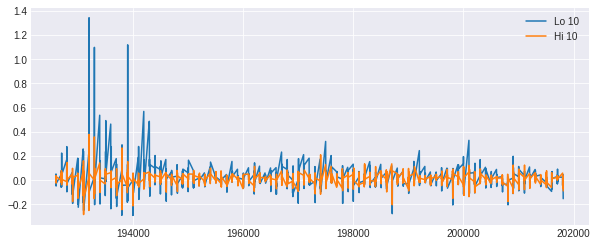

In [35]:
dff.plot(grid=True, figsize=(10,4))
plt.show()

In [36]:
# compute the volatility
vol = dff.std()
vol

Lo 10    0.106288
Hi 10    0.053900
dtype: float64

Note that this is the **monthly** volatility since we have monthly data. Compute the annualized volatility:

In [37]:
annualized_vol = vol * np.sqrt(12)
annualized_vol

Lo 10    0.368193
Hi 10    0.186716
dtype: float64

Now, we want to compute the **return per month**. We need the total numbers of months of the entire timeframe (from 1926 to 2018), which is simply the number of rows of the dataframe. Then we can use the formula for the return per month:

In [38]:
nmonths = dff.shape[0]
total_return = (1 + dff).prod() - 1
return_per_month = (1 + total_return)**(1/nmonths) - 1
return_per_month

Lo 10    0.012986
Hi 10    0.007423
dtype: float64

Now compute the **return per year** (**annualized return**) by using either the return per month or using the total return.

In [39]:
# return-per-year: using the formula with return per month and power 12
annualized_return = (1 + return_per_month)**12 - 1
print( annualized_return ) 

# which is the same as:
# return-per-year: using the formula with total return and power 12/no. of months  
#annualized_return = (1 + total_return) ** (12/nmonths) - 1
#print( annualized_return ) 

Lo 10    0.167463
Hi 10    0.092810
dtype: float64


Compute the **ROR and sharpe ratios**:

In [40]:
ROR = annualized_return / annualized_vol
ROR

Lo 10    0.454825
Hi 10    0.497063
dtype: float64

This would suggest to invest in Large caps (Hi 10) due to higher return per unit of risk. However:

In [41]:
# define a risk free rate
risk_free_rate = 0.03
excess_return  = annualized_return - risk_free_rate
sharpe_ratio   = excess_return / annualized_vol
sharpe_ratio

Lo 10    0.373346
Hi 10    0.336392
dtype: float64

In in case of a hypothetical risk-free rate of $3\%$, then we get higher sharpe ratio for Small Caps (Lo 10)$\dots$

#### Question:

Suppose that asset A loses $1\%$ a month for $12$ months and asset B gains $1\%$ per month for $12$ months. 
**Which is the more volatile asset?** The answer is easy, none of them (**their volatility is zero**), 
since they do not actually oscillate, the first stock goes all the way down while the second stock goes all the way up. 

But let us see it with an example:

In [42]:
# Create the two artifical assets with this features 
a = [10]
b = [10]
for i in range(12):
    a.append( a[i] + (-0.01)*a[i] ) # return A loses 1% every month
    b.append( b[i] + (0.01)*b[i]  ) # return B gains 1% every month
df = pd.DataFrame({"A":a, "B":b})

# Adding returns: by construction they are equal to -0.01 and 0.01 for each month...
df["returns A"] = df["A"] / df["A"].shift(1) - 1
df["returns B"] = df["B"] / df["B"].shift(1) - 1
df

,A,B,returns A,returns B
0,10.000000,10.000000,NaN,NaN
1,9.900000,10.100000,-0.01,0.01
2,9.801000,10.201000,-0.01,0.01
3,9.702990,10.303010,-0.01,0.01
4,9.605960,10.406040,-0.01,0.01
5,9.509900,10.510101,-0.01,0.01
6,9.414801,10.615202,-0.01,0.01
7,9.320653,10.721354,-0.01,0.01
8,9.227447,10.828567,-0.01,0.01
9,9.135172,10.936853,-0.01,0.01


In [43]:
# Note that asset B gains more than how much asset A looses (in absolute value)
total_returns = (1 + df[["returns A","returns B"]]).prod() - 1 
total_returns

returns A   -0.113615
returns B    0.126825
dtype: float64

i.e., investing in asset A will incur in a lost of 11.36% whereas investing in asset B will incur in a gain of 12.68%.

In [44]:
# Finally, compute the volatility:
volatility = df[["returns A","returns B"]].std()
volatility

returns A    7.422730e-17
returns B    0.000000e+00
dtype: float64

**The volatily is zero in both cases** as we expected.

### Drawdown

The Drawdown is defined as the **worst return** we would experience if we buy at very highest peak and sell at very lowest point. 
It measures **potential losses**, and therefore it is a **downside risk measure**.

In [45]:
# Load the data set 
file_to_load = erk.path_to_data_folder() + "Portfolios_Formed_on_ME_monthly_EW.csv"
rets = pd.read_csv(file_to_load, index_col=0, parse_dates=True, na_values=-99.99)

# Consider only Low 10 and High 10, i.e., Small Caps and Large Caps
# Moreover, divide by 100, since they are returns, and change the index to datatime
rets = rets[["Lo 10", "Hi 10"]] / 100
rets.columns = ["Small Caps", "Large Caps"]
rets.index = pd.to_datetime(rets.index, format="%Y%m")   #.to_period("M") forces the index to be monthly period...
rets.head()

,Small Caps,Large Caps
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In order to compute the drawdon of the two indices we do the following steps
1. Compute the so-called **wealth index**, i.e., the value of the portfolio as it compounds over times. That is, given the series of returns, it is the series of compound returns at each time frame (using *cumprod()* method) 
2. Compute previous peaks
3. Compute the **drawdown**, i.e., the wealth values as a percentage of previous peaks

In [46]:
# we start from $100 and see how they evolve according to the returns
wealth_index = 100 * (1 + rets).cumprod()
wealth_index.head()

,Small Caps,Large Caps
1926-07-01,98.550000,103.290000
1926-08-01,103.595760,107.111730
1926-09-01,104.559201,107.829379
1926-10-01,99.498535,105.209125
1926-11-01,98.722447,108.049771


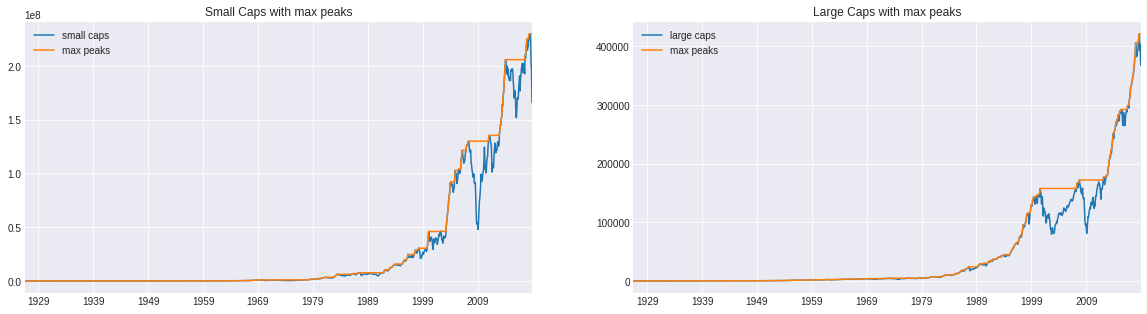

In [47]:
f, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=2)
# Plot of the wealth indices
wealth_index["Small Caps"].plot(grid=True, ax=ax[0], label="small caps", legend=True)
wealth_index["Large Caps"].plot(grid=True, ax=ax[1], label="large caps", legend=True )
# Using the cummax() method we can compute the cumulative max (peaks) throughout the series
previous_peaks = wealth_index.cummax()
previous_peaks["Small Caps"].plot(title="Small Caps with max peaks", grid=True, ax=ax[0], label="max peaks", legend=True)
previous_peaks["Large Caps"].plot(title="Large Caps with max peaks", grid=True, ax=ax[1], label="max peaks", legend=True)
plt.legend()
plt.show()

The **drawdown** is simply the difference of the wealth index from the (last) max peak, that is:
1. wealth_index - previous_peaks                    (*in absolute values*)
2. (wealth_index - previous_peaks) / previous_peaks (*in percentage*)

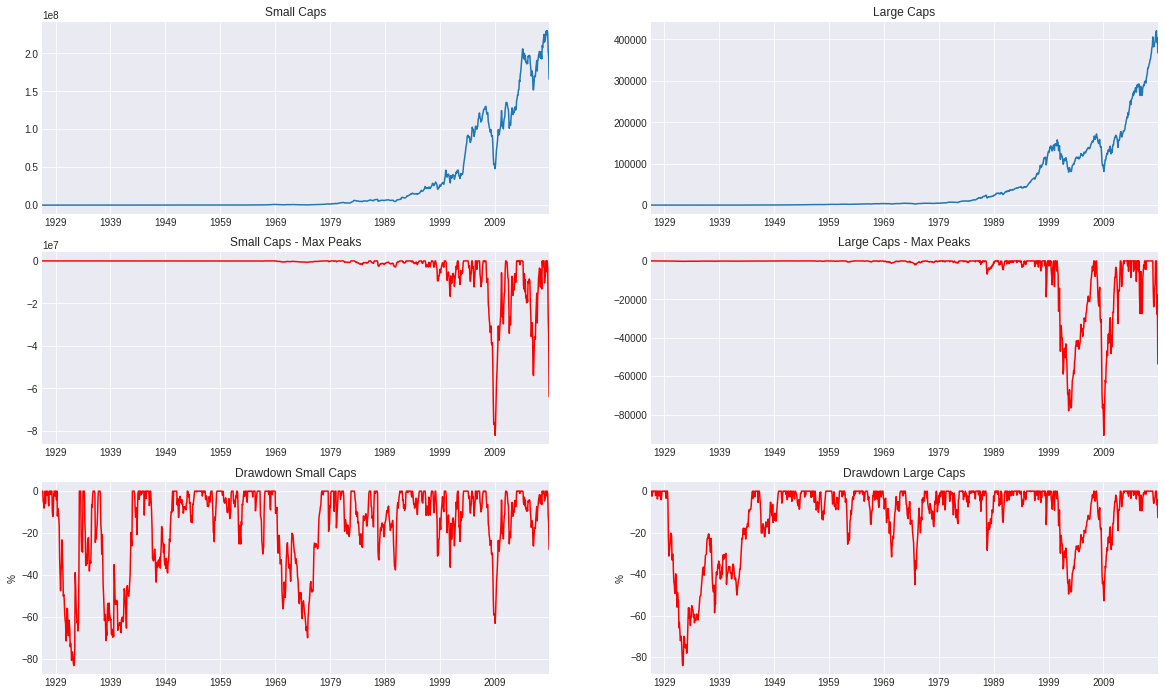

In [48]:
f, ax = plt.subplots(3,2,figsize=(20,12))
# Plot of the wealth indices
wealth_index["Small Caps"].plot(grid=True, title="Small Caps", ax=ax[0,0]) 
wealth_index["Large Caps"].plot(grid=True, title="Large Caps", ax=ax[0,1]) 

(wealth_index - previous_peaks)["Small Caps"].plot(grid=True, title="Small Caps - Max Peaks", ax=ax[1,0], color='r')
(wealth_index - previous_peaks)["Large Caps"].plot(grid=True, title="Large Caps - Max Peaks", ax=ax[1,1], color='r')

drawdown = (wealth_index - previous_peaks) / previous_peaks
(drawdown["Small Caps"]*100).plot(grid=True, title="Drawdown Small Caps", ax=ax[2,0], color='r')
(drawdown["Large Caps"]*100).plot(grid=True, title="Drawdown Large Caps", ax=ax[2,1], color='r')
ax[2,0].set_ylabel("%")
ax[2,1].set_ylabel("%")
plt.show()

For example, we see that after the '29 crisis there has been a loss of over $80\%$ of wealth for those people investing in Large Caps:

In [49]:
print("'29 crisis: ")
print( "{}%" .format( drawdown.min().round(2)*100) )
print("Date max drawdown:")
print( drawdown.idxmin() )

'29 crisis: 
Small Caps   -83.0
Large Caps   -84.0
dtype: float64%
Date max drawdown:
Small Caps   1932-05-01
Large Caps   1932-05-01
dtype: datetime64[ns]


The other two large drawdowns occured during the **dot com** crisis a the beginning of the new century and due to the **Lehman Brothers** crisis:

In [50]:
print("Dot Com crisis: ")
print( "{}%" .format( drawdown["1990":"2005"].min().round(2)*100) )
print("Date max drawdown:")
print( drawdown["1990":"2005"].idxmin() )

Dot Com crisis: 
Small Caps   -38.0
Large Caps   -50.0
dtype: float64%
Date max drawdown:
Small Caps   1990-12-01
Large Caps   2002-09-01
dtype: datetime64[ns]


In [51]:
print("Lehman Brothers crisis: ")
print( "{}%" .format( drawdown["2005":].min().round(2)*100) )
print("Date max drawdown:")
print( drawdown["2005":].idxmin() )

Lehman Brothers crisis: 
Small Caps   -63.0
Large Caps   -53.0
dtype: float64%
Date max drawdown:
Small Caps   2009-02-01
Large Caps   2009-02-01
dtype: datetime64[ns]


In our toolkit **erk** there is a function computing the **drawdown**.

### Gaussian density and distribution 
Let $X$ be a **Gaussian random variable** with mean $\mu$ and variance $\sigma^2$ (i.e., $X\sim N(\mu,\sigma^2$)). 
His **density function** is
$$
f(x) := \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right),
$$
whereas his **cumulative distribution function** is given by
$$
F_X(x) := \mathbb{P}(X\leq x) = \int_{-\infty}^x f(t)dt = \Phi(x).
$$
If $\mu=0$, and $\sigma^2=1$, we say $X$ is **standard**. 

There holds the following property:
$$
\Phi(x) = 1-\Phi(-x).
$$
Also, since $\exp(-t^2/2)$ is symmetric (i.e., an even function), we have that if $X\sim N(0,1)$, then 
the distribution of the random variable $-X$ is also $N(0,1)$, i.e. 
$$
\mathbb{P}(-X\leq x) 
= \mathbb{P}(X\geq -x)
= 1-\mathbb{P}(X\leq -x)
= 1-\Phi(-x)
= \Phi(x)
= \mathbb{P}(X\leq x),
$$
that is, $F_{-X}(x) = F_X(x)$.

### Quantiles

Let $X$ be a random variable and let $\alpha\in(0,1)$. 
The **quantile of order $\alpha$** of the distribution of $X$ is that number $\phi_\alpha\in\mathbb{R}$ 
such that $\mathbb{P}(X\leq \phi_\alpha) = \alpha$.

Now, let $X\sim N(0,1)$ be a standard normal random variable and let $\phi_\alpha$ be the $\alpha$-quantile. 
There holds:
$$
\Phi(-\phi_\alpha) 
= \mathbb{P}(X\leq - \phi_\alpha) 
= \mathbb{P}(-X\leq - \phi_\alpha) 
= \mathbb{P}(X\geq \phi_\alpha) 
= 1 - \mathbb{P}(X\leq \phi_\alpha) 
= 1 - \Phi(\phi_\alpha) 
= 1 - \alpha
= \mathbb{P}(X\leq \phi_{1-\alpha})
= \Phi(\phi_{1-\alpha}), 
$$
from which we get:
$$
-\phi_\alpha = \phi_{1-\alpha}.
$$
This is an important identity of quantiles of normal standard distribution. 

Morevoer:
$$
\mathbb{P}(|X|\leq \phi_{1-\alpha/2})
= \mathbb{P}(-\phi_{1-\alpha/2} \leq X \leq \phi_{1-\alpha/2})
= \Phi(\phi_{1-\alpha/2}) - \Phi(\underbrace{ -\phi_{1-\alpha/2} }_{= \phi_{\alpha/2}})
= (1-\alpha/2) - (\alpha/2)
= 1-\alpha.
$$

Example: **what is the 0.9-quantile**, i.e., the quantile of order 0.9, of the normal distribution?
That is, what is the number $\phi_{0.9}$ such that $\Phi(\phi_{0.9}) = \mathbb{P}(X \leq \phi_{0.9}) = 0.9$?
We are basically looking at 
$$
\phi_{0.9} = \Phi^{-1}(0.9).
$$
We can use the *norm.ppf()* from **scipy.stats** function which returns the quantiles of the Gaussian distribution. 

In [52]:
z = scipy.stats.norm.ppf(0.9, 0,1)
print('phi_0.9 = Phi^(-1)(0.9) = {:.4}' .format(z) )
#
# double check: compute Phi(0.9)
print('Double check: Phi({:.4})={:.4}' .format(z,scipy.stats.norm.cdf(z,0,1)) ) 

phi_0.9 = Phi^(-1)(0.9) = 1.282
Double check: Phi(1.282)=0.9


### Skewness and Kurtosis 

The **skewness** is a measure of the asymmetry of the probability distribution of a real-valued random variable 
about its mean. It **can be positive or negative, or undefined**.
For a unimodal distribution, **negative skewness commonly indicates that the tail is on the left side of the distribution**, and positive 
skewness indicates that the tail is on the right. 

The formal definition involves the third centered moment:
$$
S(X) := \frac{\mathbb{E}(X - \mathbb{E}(X)^3)}{\sigma^3},
$$
where $\sigma$ is the standard deviation of $X$.

The **kurtosis** is a measure of the **tailedness** of the probability distribution of a real-valued random 
variable, that is, it is a descriptor of the shape of a probability distribution. 
The formal definition involves the fourth centered moment:
$$
K(X) := \frac{\mathbb{E}(X - \mathbb{E}(X)^4)}{\sigma^4},
$$
where $\sigma$ is the standard deviation of $X$. Basically, Kurtosis is **the average of the standardized data raised to the fourth power**. Any standardized values that are less than 1 (i.e., data within one standard deviation of the mean, which is where we observe the "peak"), contribute virtually nothing to kurtosis, since raising a number that is less than 1 to the fourth power makes it closer to zero. The only data values (observed or observable) that contribute to kurtosis in any meaningful way are those outside the region of the peak; i.e., the outliers. Therefore, **kurtosis measures outliers only**, saying nothing about the peak.


**If $X$ is a Gaussian random variable we have $S(X) = 0$ and $K(X)=3$.**

In particular, the **Excess Kurtosis** is defined as Kustosis minus 3, in order to provide a comparison to the normal distribution.

#### Examples

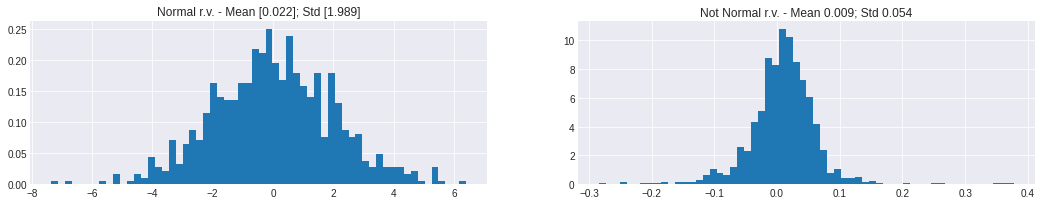

In [53]:
# Normal distributed random variable with mean 0 and std 2
A = pd.DataFrame( {"A" : np.random.normal(0, 2, size=800)} )

# Returns from FF dataset, that we know that are NOT normally distributed
B = erk.get_ffme_returns()
B = B["Hi 10"]

f = plt.figure(figsize=(18,3))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.hist( A.values ,bins=60, density=True )
ax1.set_title('Normal r.v. - Mean {}; Std {}' .format(A.mean().values.round(3),A.std().values.round(3)))
ax1.grid()

ax2.hist( B.values ,bins=60, density=True )
ax2.set_title('Not Normal r.v. - Mean {}; Std {}' .format(np.round(B.mean(),3), np.round(B.std(),3) ))
ax2.grid()

From the plot of the distributions, we can see that for the not normal random variables, we have a kind of symmetry, **but tails are fatters**. 
We then expect **the skewness to be close to zero** whereas the **kurtosis to be higher than $3$**.

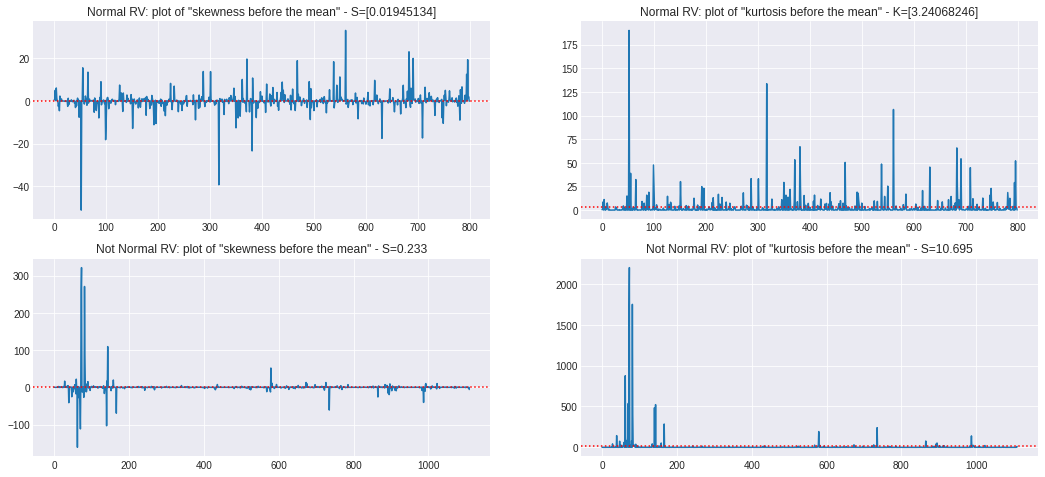

In [54]:
# Skewness of A and B
S_A = ( (A - A.mean())**3 / A.std(ddof=0)**3 ).mean() 
K_A = ( (A - A.mean())**4 / A.std(ddof=0)**4 ).mean() 

S_B = ( (B - B.mean())**3 / B.std(ddof=0)**3 ).mean()
K_B = ( (B - B.mean())**4 / B.std(ddof=0)**4 ).mean()

f = plt.figure(figsize=(18,8))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax1.plot( ((A - A.mean())**3 / A.std(ddof=0)**3).values  )
ax1.set_title('Normal RV: plot of "skewness before the mean" - S={}' .format(S_A.values) )
ax1.axhline(y=S_A[0], linestyle=":", color="red")
ax1.grid()

ax2.plot( ((A - A.mean())**4 / A.std(ddof=0)**4).values  )
ax2.set_title('Normal RV: plot of "kurtosis before the mean" - K={}' .format(K_A.values) )
ax2.axhline(y=K_A[0], linestyle=":", color="red")
ax2.grid()

ax3.plot( ((B - B.mean())**3 / B.std(ddof=0)**3).values  )
ax3.set_title('Not Normal RV: plot of "skewness before the mean" - S={}' .format(np.round(S_B,3)) )
ax3.axhline(y=S_B, linestyle=":", color="red")
ax3.grid()

ax4.plot( ((B - B.mean())**4 / B.std(ddof=0)**4).values  )
ax4.set_title('Not Normal RV: plot of "kurtosis before the mean" - S={}' .format(np.round(K_B,3)) )
ax4.axhline(y=K_B, linestyle=":", color="red")
ax4.grid()

Let us load another dataset corresponding to **hedge fund indices**:

In [55]:
hfi = erk.get_hfi_returns()
hfi.head(3)

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02-28,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03-31,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077


In [56]:
hfi_skew_kurt = pd.DataFrame(columns=["Skewness","Kurtosis"])

# Compute the skewness and kurtosis of the returns in hfi using the pandas aggregate method, 
# which takes in input a function and applies the function to every column of the given dataframe

# compute the skewness
hfi_skew_kurt["Skewness"] = hfi.aggregate( erk.skewness )

# compute the kurtosis
hfi_skew_kurt["Kurtosis"] = hfi.aggregate( erk.kurtosis )

hfi_skew_kurt

,Skewness,Kurtosis
Convertible Arbitrage,-2.639592,23.280834
CTA Global,0.173699,2.952960
Distressed Securities,-1.300842,7.889983
Emerging Markets,-1.167067,9.250788
Equity Market Neutral,-2.124435,17.218555
Event Driven,-1.409154,8.035828
Fixed Income Arbitrage,-3.940320,29.842199
Global Macro,0.982922,5.741679
Long/Short Equity,-0.390227,4.523893
Merger Arbitrage,-1.320083,8.738950


Which index has, more or less, a Gaussian distribution? It seems that **CTA Global** has a skewnesss close to zero and kurtosis close to 3. 

We can use a test, called **Jarque-Bera test** from **scipy** which is implemented in our erk toolkit.

In [57]:
# For example:
print( scipy.stats.jarque_bera( hfi["CTA Global"] ) )
print( erk.is_normal( hfi["CTA Global"] ) )

Jarque_beraResult(statistic=1.3467529104392226, pvalue=0.5099837302620382)
True


In [58]:
#while:
print( scipy.stats.jarque_bera( hfi["Convertible Arbitrage"] ) )
print( erk.is_normal(  hfi["Convertible Arbitrage"] ) )

Jarque_beraResult(statistic=4812.703130094962, pvalue=0.0)
False


The second value is the so-called **p value** which is the one to look at to see if the returs are normally distributed. 
By default, if this value is larger than $0.01$, then the answer is true, or if you want, the series of returns passes the test.

In [59]:
hfi.aggregate( erk.is_normal )

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

We see that only the CTA GLobal index of returns passes the test, i.e., it seems to be normally distributed.

## Downside risk measures

### Semivolatility (or semideviation)
Recall that the volatility of an asset is simply the standard deviation. 
The **semivolatility** is simply the volatility of the portion of the return dataset which are negative.
In fact, when returns are positive, and they largely deviate from the mean, it is not really a problem. Investors are happy if this happens and they do not concern about how much volatile positive returns are. 

**We rather concern about the volatility of negative returns**. Therefore, the definition is simply given by:
$$
\sigma_{semi} := \sqrt{ \frac{1}{N_{semi}} \sum_{R_t < 0} (R_t - \mu_{semi})^2 },
$$
where $\mu_{semi}$ is the sample mean of the negative returns and $N_{semi}$ is the number of these negative returns. 

Note that the definition can be applied to the returns which are **below the mean**, not necessarily at the negative ones.

In [60]:
# Computing the semivolatility (for negative returns) implemented in erk
erk.semivolatility( hfi )

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

### Value at Risk (VaR)

It represents the **maximum expected loss** over a certain time period. 
First of all, we specify a certain confidence **level**, in $(0,1)$, although it is typically expressed in percentage. 

For example consider a $99\%$ level (i.e., $\alpha=0.99$). When we say **$99\%$ monthly VaR** it means that we are looking at the **worst possibile outcome over a month after excluding the $1\%$ of extreme worst losses**. In other words, what is **the maximum loss that you can take with $99\%$ of probability  over one month**.

**Example:** we are given the following set of monthly returns:
$$
R = (-4\%, +5\%, +2\%, -7\%, +1\%, +0.5\%, -2\%, -1\%, -2\%, +5\%).
$$
**What is the $90\%$ monthly VaR?** 

So what we have to do is 1) to exclude the $10\%$ worst returns and 2) looking at the worst return of the remaining ones. 
Since we have $10$ returns, the $10\%$ worse return is just $1$ return, i.e., $-7\%$, and so the worse return of the remaing ones is $-4\%$. 
Then $\text{VaR} = 4\%$.

**NOTE THAT although the value we find was $-4\%$ we say that $\text{VaR} = 4\%$, i.e., the VaR is tipically a positive number.**


Mathematically, the VaR is defined as follow. Given the confidence level $\alpha\in(0,1)$,
$$
\text{VaR}_{\alpha}
:= - \text{inf}\{x\in\mathbb{R} \;:\; \mathbb{P}(R \leq x) \geq 1-\alpha \} 
= - \text{inf}\left\{x\in\mathbb{R} \;:\;  \mathbb{P}(R \geq x) \leq \alpha\right\},  
$$
that is, it is nothing but that the **$(1-\alpha)$-quantile** since we effectively want to find the number $\text{VaR}_\alpha$ such that 
$$
\mathbb{P}( R \leq -\text{VaR}_\alpha) = 1-\alpha,
$$
which says that there is a $(1-\alpha)\%$ probability of having a (negative) return greater or equal to $-\text{VaR}_\alpha$.

In previous example, the $90\%$ monthly VaR equal to $4\%$, means that 
$$
0.04 = \text{VaR}_{0.9} = -\text{inf}\{x\in\mathbb{R} \;:\; \mathbb{P}(R \leq x) \geq 0.01 \},
$$
i.e., there is a $10\%$ probability of loosing more than $4\%$ of our money invested (having monthly returns less than -$4\%$). 

### Conditional VaR (or Beyond VaR)

This is defined as the expected loss **beyond** VaR, or more formally, we look at **the average of the distribution beyond the VaR**, that is of those returns which are less than the VaR. Mathematically, this is going to be:
$$
\text{CVaR} := - \mathbb{E}( R | R<-\text{VaR}) = - \frac{\int_{-\infty}^{-\text{VaR}} t f_R(t)dt }{F_R(-\text{Var})},
$$
where $f_R$ is the density function of our returns and $F_R$ is the cumulative distribution function. 

**Example:** we are given the following set of monthly returns:
$$
R = (-4\%, +5\%, +2\%, -7\%, +1\%, +0.5\%, -2\%, -1\%, -2\%, +5\%).
$$
**What is the $80\%$ monthly CVaR?** 

So what we have to do is 1) excluding the $20\%$ worse returns and 2) looking at the worse return of the remaining ones and in this way we find $\text{VaR}_{0.8}$. 3) Then, we take the average of the returns which are less than $\text{VaR}_{0.8}$. 

Since we have $10$ returns, the $20\%$ worse return are $2$ returns, $-7\%$ and $-4\%$. The worse return among the remaining ones is $-2\%$. That is, $\text{VaR}_{0.8} = 2\%$. Now, we see that the returns less than $-\text{VaR}_{0.8}=-2\%$ are only $-7\%$ and $-4\%$. 
Their average is $\text{CVAR}_{0.8} = - (-7\%-4\%)/2 = 5.5\%$.

### Methods for estimating VaR and CVaR
We have the following methods:

#### Historical method (non parametric)
This is the most intuitive one which works by simply applying the definition of VaR as $(1-\alpha)$-quantile of the distribution of the returns of the asset under consideration. For example, consider the hedge fund indices returns:

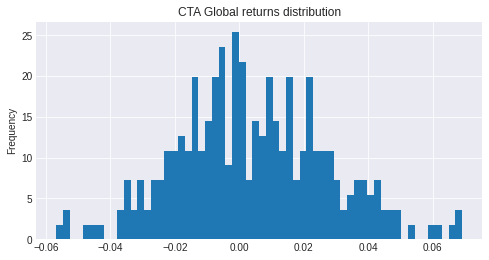

In [61]:
# get the CTA global returns
hfi = erk.get_hfi_returns()

# ...and plot their distribution
ax = hfi["CTA Global"].plot.hist(figsize=(8,4), bins=60, density=True)
ax.set_title("CTA Global returns distribution")
ax.grid()

We want to get the $90\%$, $95\%$, and $99\%$ monthly VaR. 
That is, we have levels $1-\alpha=0.01, 0.05, 0.01$. We can use the *percentile* method.

In [62]:
alpha = np.array([0.90, 0.95, 0.99])
level = 1 - alpha

# In the percentile method, we multiply by 100 because it wants an input between 0 and 100
VaRs = -np.percentile(hfi["CTA Global"], level*100)

print("90% Var: {:.2f}%".format(VaRs[0] * 100))
print("95% Var: {:.2f}%".format(VaRs[1] * 100))
print("99% Var: {:.2f}%".format(VaRs[2] * 100))

90% Var: 2.41%
95% Var: 3.17%
99% Var: 4.95%


It means that there is a $10\%$, $5\%$, $1\%$ probability that any given month we can loose at least about $2.4\%$, $3\%$, and $5\%$, respectively. 

Or, alternatively, that **there is a $90\%$, $95\%$, $99\%$ probability that for any given month we loose less than $2.4\%$, $3\%$, and $5\%$, respectively.**

It is worth saying that this way of computing VaR is, however, sensitive to the timescale of our returns, 
because a VaR computed using monthly returns will be different from a VaR computed using weekly returns$\dots$

#### Parametric method (Gaussian)
Here, we **assume that the returns are normally distributed**, which is, however, **often incorrect**. 

Let $\mu$ and $\sigma$ be the mean and the volatility of the returns $R$ and suppose that $R\sim N(\mu,\sigma)$. 
Via standardization, we can express $R$ as $R = \mu + X \sigma$, where $X\sim N(0,1)$. 
This way, **for computing $\text{VaR}_\alpha$, i.e. the $(1-\alpha)$-quantile of the distribution of $R$, we can compute the $(1-\alpha)$-quantile of the stardard normal distribution**. 

By definition of $\text{VaR}_\alpha$ and quantiles, we want to find the number $z_\alpha$ such that 
$$
\mathbb{P}(R \leq z_\alpha) = 1-\alpha.
$$
Hence we would have:
$$
1-\alpha = \mathbb{P}(R \leq z_\alpha) = \mathbb{P}(\mu+ X\sigma \leq z_\alpha) 
= \mathbb{P}\left(X \leq \frac{z_\alpha-\mu}{\sigma}\right) 
= \Phi\left( \frac{z_\alpha-\mu}{\sigma} \right)
\qquad\Longrightarrow\qquad
z_\alpha = \mu + \Phi^{-1}(1-\alpha)\sigma 
$$
Hence, we have found:
$$
\text{VaR}_\alpha = -\left(\;\mu + \Phi^{-1}(1-\alpha) \sigma\;\right),
$$
where $\Phi^{-1}(1-\alpha)$ is the $(1-\alpha)$-quantile of the Gaussian distribution that we can find using the *norm.ppf*, 
and $\mu$ and $\sigma$ are the mean and volatility of our returns series, respectively 
(here, recall that we put a minus since we want the VaR to be a positive number).

In [63]:
# Compute the 95% monthly Gaussian VaR of the hedge fund indices 
alpha = 0.95
erk.var_gaussian( hfi, level=1-alpha)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

#### Cornish-Fisher method (semi parametric)

This is a modification of the parametric Gaussian method. The method uses the **Cornish-Fisher expansion (1937) of quantiles** which basically relates the $\alpha$-quantilies of **non Gaussian** distribution with the $\alpha$-quantiles of the Gaussian distribution 
in the following way:
$$
\tilde{z}_\alpha 
= z_\alpha + \frac{1}{6}(z_\alpha^2 - 1)S 
+ \frac{1}{24}(z_\alpha^3 - 3 z_\alpha)(K-3) 
- \frac{1}{36}(2z_\alpha^3 - 5 z_\alpha)S^2
$$
where $\tilde{z}_\alpha$, $S$, and $K$ denote the $\alpha$-quantile, the skewness, and the kurtosis of the the non Gaussian distribution (say, our returns series), respectively, and $z_\alpha$ is the $\alpha$-quantile of the Gaussian distribution. 
Notice that if the distribution of our series was, effectively, Gaussian, then $S=0$ and $K=3$ and so $\tilde{z}_\alpha$ would be equal to $z_\alpha$.

Therefore, with this method, we have:
$$
\text{VaR}_\alpha = -\left(\;\mu + \tilde{z}_\alpha  \sigma\;\right).
$$

In [64]:
# Compute the 95% monthly Gaussian VaR of the hedge fund indices using the Cornish-Fisher method
erk.var_gaussian(hfi, cf=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

Finally, the **conditional VaR** is computed using the historical method: look at the *cvar_historic* from the *erk* toolkit.

#### Compare VaRs

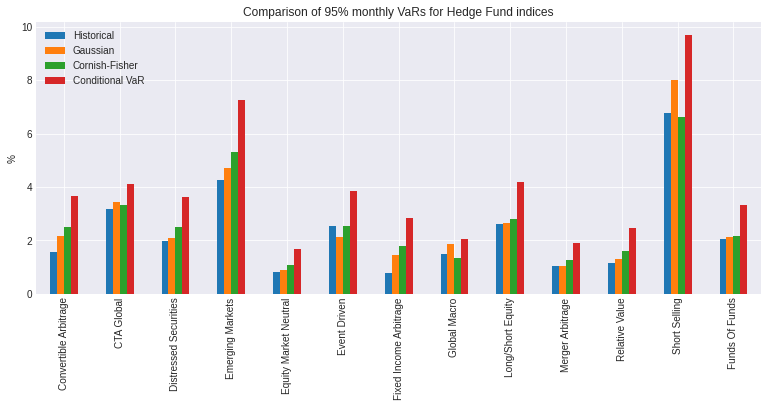

In [65]:
comparevars = pd.concat([erk.var_historic(hfi), erk.var_gaussian(hfi), erk.var_gaussian(hfi,cf=True), erk.cvar_historic(hfi)], axis=1)
comparevars.columns = ["Historical","Gaussian","Cornish-Fisher","Conditional VaR"]
(comparevars * 100).plot.bar(figsize=(13,5), grid=True, title="Comparison of 95% monthly VaRs for Hedge Fund indices")
plt.ylabel("%")
plt.show()

Observe how the conditional VaR is normally the larger type of VaR, whereas teh historical method normally gives the smallest VaR.